In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv.imread('./MRI.png', cv.IMREAD_GRAYSCALE)
image.shape

(207, 176)

In [3]:
def correlation(img, kernel, padding=0, function=np.sum):
        fh, fw = kernel.shape
        padh, padw = int((fh - 1) / 2), int((fw - 1) / 2)
        n_H, n_W = img.shape[0] + 2 * padh - fh + 1 , img.shape[1] + 2 * padw - fw + 1
        result = np.zeros((n_H, n_W))
        padded_img = np.pad(img, ((padh, padh), (padw, padw)), mode='constant', constant_values = (padding, padding))
        for h in range(n_H):
            vert_start = h
            vert_end = vert_start + fh
            for w in range(n_W):
                horiz_start = w
                horiz_end = horiz_start + fw
                slice_ = padded_img[vert_start:vert_end, horiz_start:horiz_end]
                result[h, w] = function(kernel * slice_)
        return result[padh:-padh, padw:-padw]

In [4]:
filters = {
    'mean_3': (np.ones((3, 3)), np.mean),
    'mean_5': (np.ones((5,5)), np.mean),
    'median_3': (np.ones((3, 3)), np.median),
    'median_5': (np.ones((5,5)), np.median),
    'sobel_x': (np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]]), np.sum),
    'sobel_y': (np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]]), np.sum),
    'laplacian': (np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]]), np.sum),
    'custom': (np.array([[1, 1.5, 1],
                        [1.5, 2, 1.5],
                        [1, 1.5, 1]]), np.mean),
}

def filter_image(img, filter_name):
    result = correlation(img, filters[filter_name][0], function=filters[filter_name][1])
    if filter_name == 'laplacian':
        result = (result - np.min(result)) / (np.max(result) - np.min(result)) * 255
    elif "sobel" in filter_name:
        result = np.abs(result)
        result = (result - np.min(result)) / (np.max(result) - np.min(result)) * 255
    return result.astype(np.uint8)

In [5]:
images = {}
for k in filters:
    images[k] = filter_image(image, k)

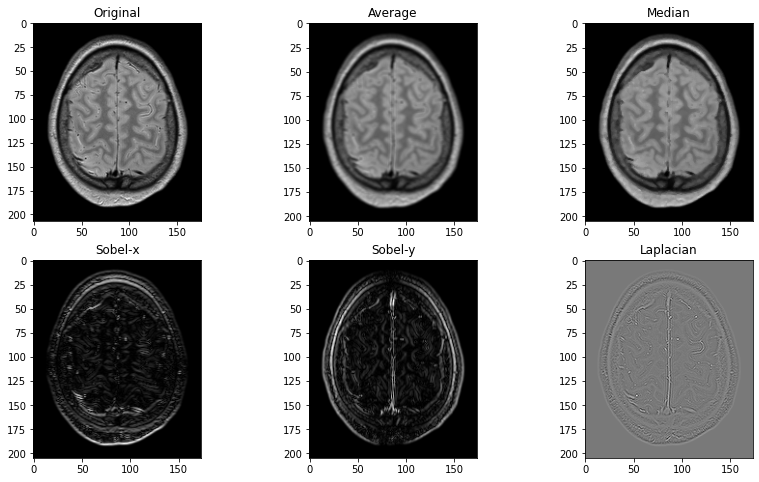

In [6]:
fig, ax = plt.subplots(2, 3, figsize = (14, 8))

ax[0,0].imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,0].set_title('Original')

ax[0,1].imshow(images["mean_3"], cmap = 'gray', vmin = 0, vmax = 255)
ax[0,1].set_title('Average')

ax[0,2].imshow(images["median_3"], cmap = 'gray', vmin = 0, vmax = 255)
ax[0,2].set_title('Median')

ax[1,0].imshow(images["sobel_x"], cmap = 'gray', vmin = 0, vmax = 255)
ax[1,0].set_title('Sobel-x')

ax[1,1].imshow(images["sobel_y"], cmap = 'gray', vmin = 0, vmax = 255)
ax[1,1].set_title('Sobel-y')

ax[1,2].imshow(images["laplacian"], cmap = 'gray', vmin = 0, vmax = 255)
ax[1,2].set_title('Laplacian')

plt.show();

## as you can see :
* median filter has removed impulses and mean filter has blurred and smoothed image

* sobel-x filter has detected horizontal edges because of it gets derivation in horizontal direction 
* sobel-y filter has detected vertical edges because of it gets derivation in vertical direction

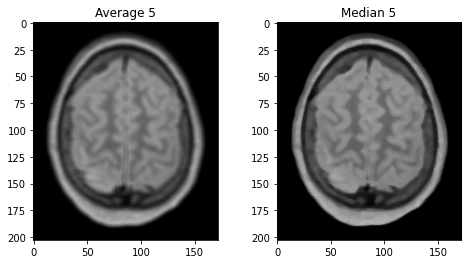

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(images["mean_5"], cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Average 5')

ax[1].imshow(images["median_5"], cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Median 5')

plt.show();

* Average 5x5 has blurred more than Average 3x3 and because of turning kernel size bigger we can see that in result there is no impulses(not good way)

* Median 5x5 has removed the impulses more than Median 3x3 (bigger salts and papers) and because of turning kernel size bigger we can see that result is blurrier than Median 3x3

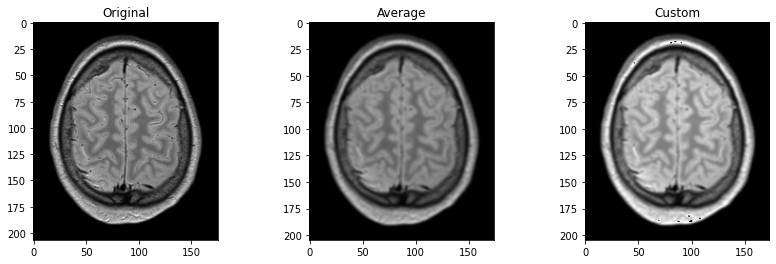

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

ax[0].imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')

ax[1].imshow(images["mean_3"], cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Average')

ax[2].imshow(images["custom"], cmap = 'gray', vmin = 0, vmax = 255)
ax[2].set_title('Custom')

plt.show();

* my custom filter is $\begin{matrix}
1 & 1.5 & 1 \\
1.5 & 2 & 1.5 \\
1 & 1.5 & 1
\end{matrix}$

* as we can see: there is more detaile in middle of the image compare to Average 3x3